# Time Series Project
---
---

## 1 Load Necessary Library

In [1]:
import pandas as pd
import numpy as np

## 2 Load Data

In [2]:
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


## 3 Changing the column Name

In [5]:
df.columns = ["Month", "Sales"]

In [6]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   106 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


## 4 Remove Nan Values

In [8]:
df = df.dropna(axis = 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


## 5 convert Month to Datetime format

In [11]:
df["Month"] = pd.to_datetime(df["Month"])

In [12]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


## 6 Set Month Column as index

In [14]:
df.set_index("Month", inplace = True)

In [15]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


---
## Visualization of Data
---

<AxesSubplot:xlabel='Month'>

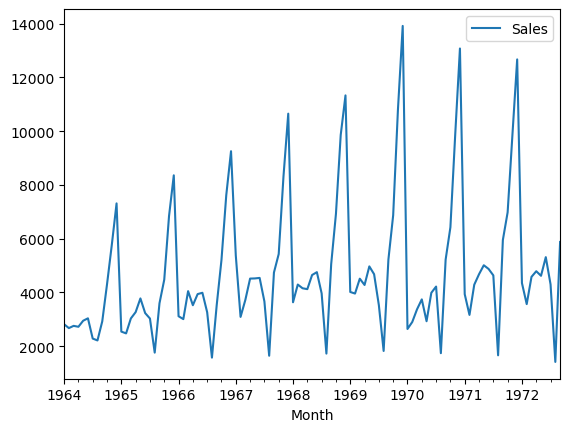

In [16]:
df.plot()

## 7 Check the Stationary or not

In [17]:
from statsmodels.tsa.stattools import adfuller

C:\Users\06533V744\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:
labels = adfuller(df['Sales'])

In [34]:
labels

(-1.8335930563276175,
 0.3639157716602477,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [37]:
p_value = labels[1]

In [48]:
# H0 : Null Hypothesis - Data is non Stationary
# H1 : Data is Not Non Stationary

if p_value<0.05:
    print("Data is Stationary")
else:
    print("Date is Non Stationary")

Date is Non Stationary


In [49]:
def adfuller_test(value):
    x = adfuller(value)
    p_value = x[1]
    if p_value<=0.05:
        print("Rejest Null Hypothesis , Data is Stationary")
    else:
        print("Accept Null Hypothesis, Date is Non Stationary")

## 8 Differencing

In [50]:
df['Sales Difference'] = df['Sales']-df['Sales'].shift(1)

In [51]:
df.head()

,Sales,Mean,StdDev,Sales Difference
Month,,,,
1964-01-01,2815.0,4761.152381,2553.502601,NaN
1964-02-01,2672.0,4761.152381,2553.502601,-143.0
1964-03-01,2755.0,4761.152381,2553.502601,83.0
1964-04-01,2721.0,4761.152381,2553.502601,-34.0
1964-05-01,2946.0,4761.152381,2553.502601,225.0


In [52]:
adfuller_test(df['Sales Difference'].dropna())

Rejest Null Hypothesis , Data is Stationary


In [53]:
df['Seasonal Difference'] = df['Sales']-df['Sales'].shift(12)

In [56]:
adfuller_test(df["Seasonal Difference"].dropna())

Rejest Null Hypothesis , Data is Stationary


In [57]:
df.head()

,Sales,Mean,StdDev,Sales Difference,Seasonal Difference
Month,,,,,
1964-01-01,2815.0,4761.152381,2553.502601,NaN,NaN
1964-02-01,2672.0,4761.152381,2553.502601,-143.0,NaN
1964-03-01,2755.0,4761.152381,2553.502601,83.0,NaN
1964-04-01,2721.0,4761.152381,2553.502601,-34.0,NaN
1964-05-01,2946.0,4761.152381,2553.502601,225.0,NaN


<AxesSubplot:xlabel='Month'>

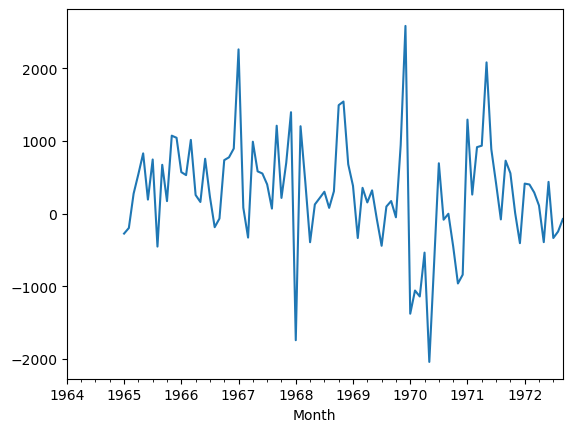

In [63]:
df["Seasonal Difference"].plot()

## 9 Check the Correlation 

In [67]:
import pandas

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

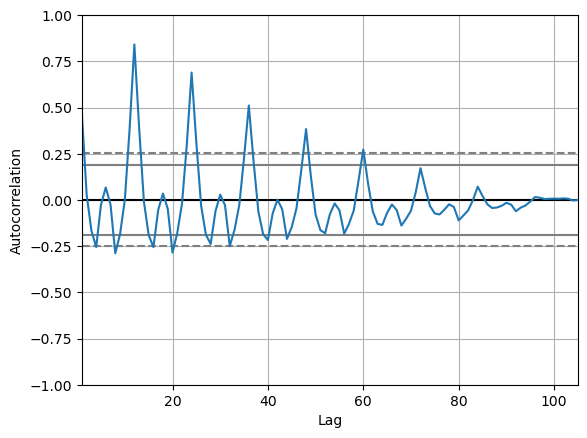

In [73]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

## 10 Determine the value of p d q based on ACF and PACF

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\06533V744\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


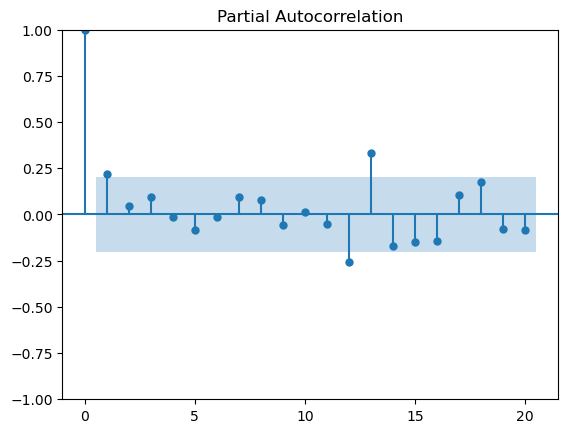

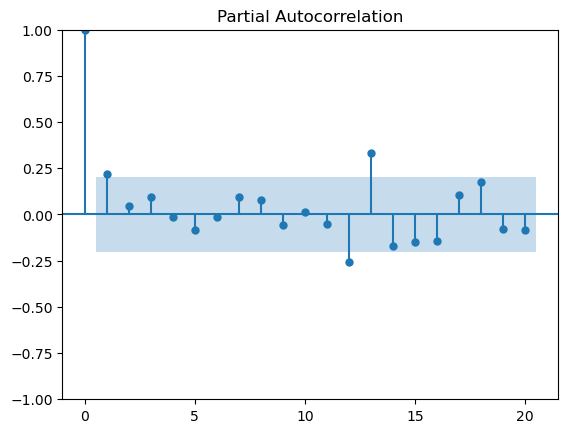

In [80]:
plot_pacf(df["Seasonal Difference"].dropna())

In [81]:
# p ==1

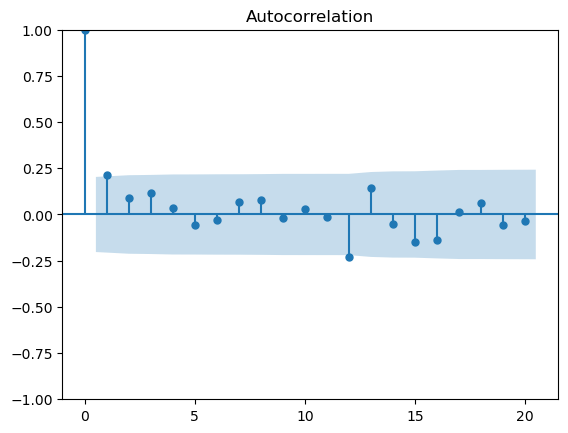

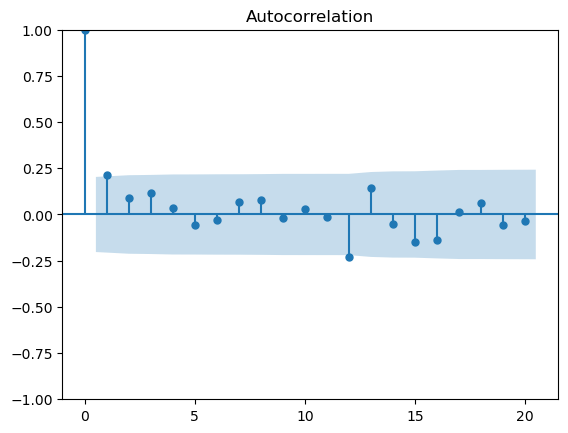

In [76]:
plot_acf(df["Seasonal Difference"].dropna())

In [82]:
# q = 1

## 11 Model Building

In [90]:
import statsmodels.api as sm

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [88]:
"""model = ARIMA(df['Sales'], order= (1,1,1))
model_fit = model.fit()"""

"model = ARIMA(df['Sales'], order= (1,1,1))\nmodel_fit = model.fit()"

In [91]:
model = sm.tsa.arima.ARIMA(df["Sales"], order=(1,1,2))

C:\Users\06533V744\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\06533V744\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\06533V744\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [92]:
model_fit = model.fit()

In [94]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -948.534
Date:                Mon, 22 Jan 2024   AIC                           1905.069
Time:                        20:45:24   BIC                           1915.646
Sample:                    01-01-1964   HQIC                          1909.354
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2206      0.153     -1.440      0.150      -0.521       0.080
ma.L1         -0.1506      0.112     -1.350      0.177      -0.369       0.068
ma.L2         -0.7651      0.092     -8.329      0.000      -0.945      -0.585
sigma2      4.795e+06   6.41e+05      7.481      0.000    3.54e+06    6.05e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.97   Prob(JB):                         0.35
Heteroskedasticity (H):               3.38   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
model = sm.tsa.statespace.SARIMAX(df["Sales"], order=(1,1,1), seasonal_order=(1,1,1,12))

C:\Users\06533V744\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\06533V744\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [96]:
model_fit = model.fit()

In [100]:
df['Forecast'] = model_fit.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

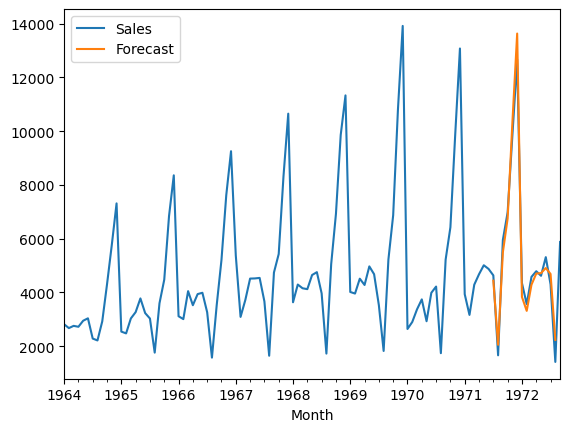

In [102]:
df[['Sales','Forecast']].plot()

## 12. Prediction on Unknown Data

In [104]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [105]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [106]:
future_datest_df.tail()

,Sales,Mean,StdDev,Sales Difference,Seasonal Difference,Forecast
1974-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

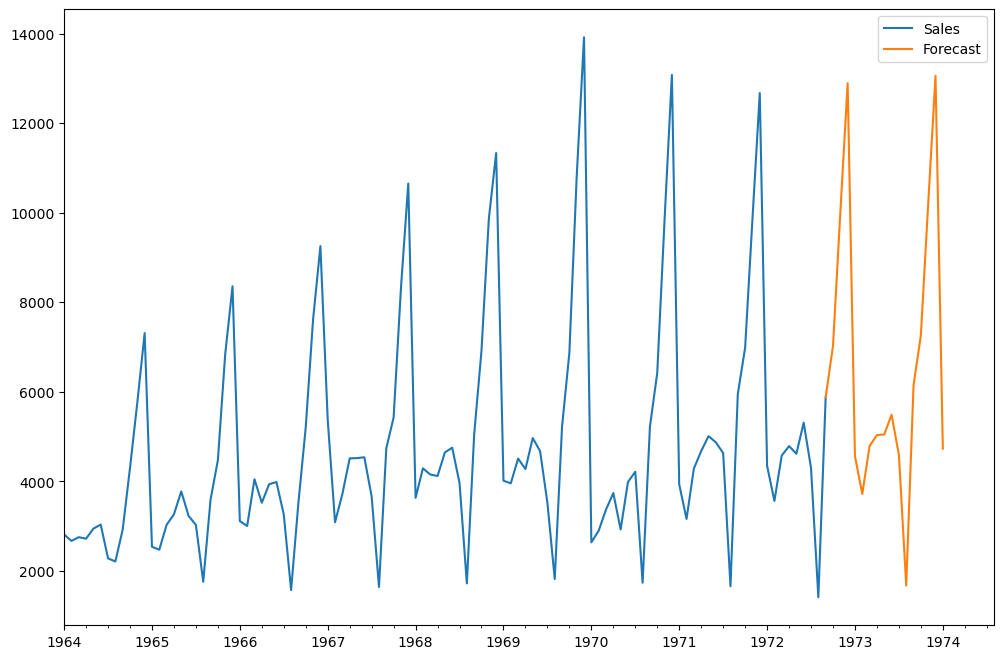

In [109]:
future_df['Forecast'] = model_fit.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'Forecast']].plot(figsize=(12, 8)) 